# Using the archive of `opsim` runs and summary metrics

## Introduction

The Rubin Observatory Survey Strategy Team is producing an extensive collection of survey strategy simulations (using `opsim`) and corresponding analysis (using `MAF`). Many of these are of interest for science collaborations, and are publicly available. One interface to this data is [interactive web page](http://astro-lsst-01.astro.washington.edu:8081/) with lists of simulation runs and links ot `opsim` configuration and output files (databases of scheduled visits with simulated data quality) and output of `MAF` including summary values and plots:

- http://astro-lsst-01.astro.washington.edu:8081/
    
A programmatic interface to this data is also sometimes helpful. The `rubin_sim.maf.archive` module provides such an interface.

## Basic concepts

Survey strategy executions and analysis are assigned names and collected into groups for easy management and reference, according to the following nomenclature:

| term | discussion |
|------|------------|
| run | A **run** is a single execution of `opsim`. Each run produces an SQLite database of visits with data describing each visit (e.g. the start time, filter used, simulated seeing, etc.). Each `run` has a canonical "run name". Examples include `baseline_nexp2_v1.7.1_10yrs`, `barebones_nexp2_v1.6_10yrs`, and `combo_dust_nexp2_v1.6_10yrs`.|
| family | The survey strategy team often produces collections of runs designed to explore a specific aspect of survey strategy. Different runs in a collection vary the aspect of survey strategy being studied, while keeping other aspects the same. Comparing runs that are part of the same collection or **family** therefore supports exploring the effects of varying a specific parameter or other scheduler feature. Other collections for which direct comparison might be useful can also sometimes be grouped into the same family. Examples include the `version_baselines` famile, which include simulations that have been used as "baselines" at different points in time; and `potential_schedulers`, which are runs that appeared to be good candidates using the `FBS_1.6` version of `opsim`. |
| summary metric | A **summary metric** is a single scalar representing some feature of an `opsim` run, generally one that indicates some aspect of the quality of the survey. Each `MAF` metric may produce any number of summary metrics, and each execution of MAF may construct an arbitrary number of summary metrics, depending on the MAF metric bundles executed. Each summary metric has a cannonical name derived from various elements of the metric bundle. |
| summary metric sets | Standard executions of MAF on opsim runs produce thousands of summary metrics, and users will only wish to inspect and compare limited subsets of these summary metrics at any given time. The survey strategy team has therefore pre-defined a collection of named sets of metrics, so that sets of metrics usefully examined as a group can be referenced together. Examples of summary metric sets include `srd` (which correspond to requirement in the Science Requirements Document), `Nvis` (which counts visits of different types), `tvs` (summary metrics of interest to the transients and variable stars working group), `descWFD` (summary metrics of interest to DESC analysis of the WFD survey), and more. | 

## Notebook preparation

The following is a development style aid; only uncomment if developing the notebook:

In [1]:
%load_ext lab_black
%load_ext pycodestyle_magic
%flake8_on --ignore E501,W505

Required imports:

In [2]:
# import rubin_sim
# from rubin_sim import maf

In [3]:
%load_ext autoreload
%autoreload 1
%aimport archive

In [4]:
%aimport rubin_sim
from rubin_sim import maf

## Run families

The "families" json file organizes `opsim` runs into "families," groups of runs that vary in a controlled way, and which are approprate for direct comparison with each other in order to understand the effects of varying specific parameters, or making specific alterations to survey strategy.

You can download a table of families, their descriptions, and definitions into a `pandas.DataFrame` thus:

In [5]:
families = archive.get_family_descriptions()
families

,version,reference,description,run,brief,filepath,url
family,,,,,,,
baseline,2,baseline_v2.0_10yrs,**baseline** : The v2.0 baseline simulation. T...,[baseline_v2.0_10yrs],[v2.0 baseline],[baseline/baseline_v2.0_10yrs.db],[http://epyc.astro.washington.edu/~lynnej/opsi...
retro,2,baseline_v2.0_10yrs,**retro** : The retro family provides two simu...,"[baseline_retrofoot_v2.0_10yrs, retro_baseline...","[v1.x footprint but new code capabilities, v1....","[retro/baseline_retrofoot_v2.0_10yrs.db, retro...",[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,"[rolling_ns2_rw0.5_v2.0_10yrs, rolling_ns3_rw0...","[Rolling half-sky (2 regions) 50%, Rolling thi...","[rolling/rolling_ns2_rw0.5_v2.0_10yrs.db, roll...",[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_bulge,2,baseline_v2.0_10yrs,**rolling_bulge** : The updated baseline conta...,"[rolling_bulge_ns2_rw0.5_v2.0_10yrs, rolling_b...","[Roll in the bulge with 2 regions, 50%, Roll i...",[rolling_bulge/rolling_bulge_ns2_rw0.5_v2.0_10...,[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_bulge_6,2,baseline_v2.0_10yrs,**rolling_bulge_6** : The updated baseline con...,[rolling_bulge_6_v2.0_10yrs],[Roll the bulge in 6 stripes (low-dust WFD in ...,[rolling_bulge_6/rolling_bulge_6_v2.0_10yrs.db],[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_six,2,baseline_v2.0_10yrs,**rolling_six** : The updated baseline contain...,"[six_rolling_ns6_rw0.5_v2.0_10yrs, six_rolling...","[Rolling in one-sixth sky (6 regions) 50%, Rol...",[rolling_six/six_rolling_ns6_rw0.5_v2.0_10yrs....,[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_early,2,baseline_v2.0_10yrs,**rolling_early** : The updated baseline conta...,[roll_early_v2.0_10yrs],[Start rolling year 1],[rolling_early/roll_early_v2.0_10yrs.db],[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_all_sky,2,baseline_v2.0_10yrs,**rolling_all_sky** : The updated baseline con...,[rolling_all_sky_ns2_rw0.9_v2.0_10yrs],[Roll on all parts of the sky],[rolling_all_sky/rolling_all_sky_ns2_rw0.9_v2....,[http://epyc.astro.washington.edu/~lynnej/opsi...
noroll,2,baseline_v2.0_10yrs,**noroll** : The updated baseline contains a 2...,[noroll_v2.0_10yrs],[v2.0 baseline with no rolling],[noroll/noroll_v2.0_10yrs.db],[http://epyc.astro.washington.edu/~lynnej/opsi...


By default, `get_family_descriptions` retrives the runs data from a json file at the URL provided in `archive.FAMILY_SOURCE`:

In [6]:
archive.FAMILY_SOURCE

'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/runs_v2.0.json'

If you wish to load runs from an alternate source, it can be specified with the `family_source` argument to `get_family_descriptions`.

You can use the loaded data to get a list of available families:

You can get more pleasantly formatted descriptions of the families using `archive.describe_families`:

In [7]:
archive.describe_families(families.loc[["baseline", "retro"]])

---
**baseline** : The v2.0 baseline simulation. This features a modified survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence.   
**version**: 2  
**runs**:  


,brief,filepath
run,,
baseline_v2.0_10yrs,v2.0 baseline,baseline/baseline_v2.0_10yrs.db


---
**retro** : The retro family provides two simulations to bridge the gap between previous sets of simulations and the updated baseline. One (retro_baseline) uses the current code base to re-run the previous baseline (i.e. this is baseline_nexp2_v1.7.1_10yrs, but run with rubin_sim) while the other (retrofoot) uses updated code settings but re-creates the baseline_nexp2_v1.7.1_10yrs footprint. These are primarily intended to help users understand potential changes in their metric results from the 1.x series of runs to the v2.0 runs, as well as the modification from sims_maf to rubin_sim.  
**version**: 2  
**runs**:  


,brief,filepath
run,,
baseline_retrofoot_v2.0_10yrs,v1.x footprint but new code capabilities,retro/baseline_retrofoot_v2.0_10yrs.db
retro_baseline_v2.0_10yrs,v1.x baseline with rubin_sim (without new code capabilities),retro/retro_baseline_v2.0_10yrs.db


## Getting a table of runs

You can download a `pandas.DataFrame` of runs with basic information on each using `get_runs`:

In [8]:
runs = archive.get_runs()
runs

,family,version,brief,filepath,url
run,,,,,
baseline_retrofoot_v2.0_10yrs,[retro],[2],v1.x footprint but new code capabilities,retro/baseline_retrofoot_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
baseline_v2.0_10yrs,[baseline],[2],v2.0 baseline,baseline/baseline_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
bluer_indx0_v2.0_10yrs,[bluer],[2],"More g - filter ratio in WFD of {'u': 0.07, 'g...",bluer/bluer_indx0_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
bluer_indx1_v2.0_10yrs,[bluer],[2],More u and g - filter ratio in WFD of {'u': 0....,bluer/bluer_indx1_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
carina_v2.0_10yrs,[microsurveys],[2],One week per year observing Carina,microsurveys/virgo_cluster/virgo_cluster_v2.0_...,http://epyc.astro.washington.edu/~lynnej/opsim...
...,...,...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,[vary_nes],[2],NES at 50% WFD level,vary_nes/vary_nes_nesfrac0.50_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
vary_nes_nesfrac0.55_v2.0_10yrs,[vary_nes],[2],NES at 55% WFD level,vary_nes/vary_nes_nesfrac0.55_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
vary_nes_nesfrac0.75_v2.0_10yrs,[vary_nes],[2],NES at 75% WFD level,vary_nes/vary_nes_nesfrac0.75_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...


By default, `get_runs` retrives the runs data from the same json file as `archive.get_family_descriptions`, and also has an argument to download the data from a different source.

`get_family_descriptions` and `get_runs` load the same data, but the former is indexed by families, with one row per family; and the later by runs, with one row per run. In the former case, values that vary by run for the same family have list values, while in the later case values that vary by family for the same run have list values.

If you want a `DataFrame` with one row per run/family combination, such that there are no columns with list-valued cells, you can `explode` the `pandas.DataFrame` returned by `get_runs` (or `get_family_descriptions`) and set the `family` column to be the index, or use the `get_family_runs` shorthand:

In [9]:
family_runs = archive.get_family_runs()
family_runs

,run,brief,filepath,version,reference,description,url
family,,,,,,,
baseline,baseline_v2.0_10yrs,v2.0 baseline,baseline/baseline_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**baseline** : The v2.0 baseline simulation. T...,http://epyc.astro.washington.edu/~lynnej/opsim...
retro,baseline_retrofoot_v2.0_10yrs,v1.x footprint but new code capabilities,retro/baseline_retrofoot_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**retro** : The retro family provides two simu...,http://epyc.astro.washington.edu/~lynnej/opsim...
retro,retro_baseline_v2.0_10yrs,v1.x baseline with rubin_sim (without new code...,retro/retro_baseline_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**retro** : The retro family provides two simu...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns2_rw0.5_v2.0_10yrs,Rolling half-sky (2 regions) 50%,rolling/rolling_ns2_rw0.5_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns3_rw0.5_v2.0_10yrs,Rolling third-sky (3 regions) 50%,rolling/rolling_ns2_rw0.9_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...
...,...,...,...,...,...,...,...
microsurveys,twilight_neo_nightpattern3v2.0_10yrs,Twilight neo observations 1 night on 2 off,microsurveys/local_gals/local_gal_bindx0_v2.0_...,2,baseline_v2.0_10yrs,**microsurveys** : There are special programs ...,http://epyc.astro.washington.edu/~lynnej/opsim...
microsurveys,twilight_neo_nightpattern6v2.0_10yrs,Twilight neo observations 3 night on 4 off,microsurveys/carina/carina_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**microsurveys** : There are special programs ...,http://epyc.astro.washington.edu/~lynnej/opsim...
microsurveys,twilight_neo_nightpattern5v2.0_10yrs,Twilight neo observations 4 night on 4 off,microsurveys/short_exp/short_exp_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**microsurveys** : There are special programs ...,http://epyc.astro.washington.edu/~lynnej/opsim...


This makes it easy to reference just the runs from a family (or set of families) of interest.

`get_family_runs` reads the run metadata from the same source as `get_runs`, and (like `get_runs`) alternate sources can be specified by an argument.

First, let's look at a list of all families, and how many runs are in each:

In [10]:
family_runs.groupby("family").agg({"run": "count"})

,run
family,
baseline,1
bluer,2
ddf,2
long_gaps,16
long_gaps_nopair,16
long_u,2
microsurveys,19
noroll,1
presto,12


If I want to work with just runs in `baseline` or `rolling`, I can build `pandas.DataFrame` of such runs by slicing `family_runs`:

In [11]:
my_runs = family_runs.loc[["baseline", "rolling"]]
my_runs

,run,brief,filepath,version,reference,description,url
family,,,,,,,
baseline,baseline_v2.0_10yrs,v2.0 baseline,baseline/baseline_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**baseline** : The v2.0 baseline simulation. T...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns2_rw0.5_v2.0_10yrs,Rolling half-sky (2 regions) 50%,rolling/rolling_ns2_rw0.5_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns3_rw0.5_v2.0_10yrs,Rolling third-sky (3 regions) 50%,rolling/rolling_ns2_rw0.9_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns2_rw0.9_v2.0_10yrs,Rolling half-sky (2 regions) 90%,rolling/rolling_ns3_rw0.5_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns3_rw0.9_v2.0_10yrs,Rolling third-sky (3 regions) 90%,rolling/rolling_ns3_rw0.9_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...


## Getting summary metrics on runs

`get_metric_summaries` will retrieve the "summary" results of MAF for these runs into a `pandas.DataFrame`. It can either be called with no arguments (in which case it will get all summary metrics for all runs), or you can supply argumets to specificy which runs, run familes, and metrics you want. Be default, summary data is downloaded from the URL specified by `archive.DEFAULT_SUMMARY_SOURCE`. Users may pass an alternate source (URL or file name) to `get_metric_summaries` to load the data from elsewhere.

In [12]:
archive.SUMMARY_SOURCE

'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_11_8.csv'

For example, to get only metrics on runs in the `version_baselines` family:

In [13]:
archive.get_metric_summaries(run_families="rolling")

metric,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,fOArea_750 fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,95th Percentile Parallax Error Parallax Error @ 22.4 All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,...,Rms AGN SF_error z band HealpixSlicer,Median AGN SF_error z band HealpixSlicer,Max AGN SF_error z band HealpixSlicer,Min AGN SF_error z band HealpixSlicer,N(+3Sigma) AGN SF_error z band HealpixSlicer,N(-3Sigma) AGN SF_error z band HealpixSlicer,AGN SF_error z band HealpixSlicer,25th%ile AGN SF_error z band HealpixSlicer,75th%ile AGN SF_error z band HealpixSlicer,AreaThreshold AGN SF_error z band HealpixSlicer
run,,,,,,,,,,,,,,,,,,,,,
rolling_ns2_rw0.5_v2.0_10yrs,12614.583488,0.700810,838.0,787.0,1.015758,0.953939,18602.104352,2.378763,10.093170,4.433085,...,0.028826,0.042033,0.384707,0.020230,571.0,0.0,29541.0,0.036877,0.055912,10130.274298
rolling_ns2_rw0.9_v2.0_10yrs,12893.228978,0.716290,839.0,787.0,1.016970,0.953939,18620.568813,2.423048,10.034633,4.640184,...,0.028729,0.042319,0.397783,0.020434,564.0,0.0,29529.0,0.037055,0.055711,9874.289736
rolling_ns3_rw0.5_v2.0_10yrs,12729.566717,0.707198,838.0,788.0,1.015758,0.955152,18609.657995,2.407053,10.245571,4.452221,...,0.028065,0.042466,0.357987,0.021743,562.0,0.0,29601.0,0.037091,0.054879,9716.502531
rolling_ns3_rw0.9_v2.0_10yrs,13255.803832,0.736434,841.0,788.0,1.019394,0.955152,18616.372344,2.463206,9.876820,4.522123,...,0.028472,0.043272,0.367384,0.020158,599.0,0.0,29521.0,0.037427,0.056101,9326.230986


It returned more than 37000 metrics! This is more than necessary or convenient for most purposes.

## Metric sets

Rather than sort through all these metrics, you can work with pre-defined sets of metrics generated for a variety of purposes. `get_metric_sets` loads definitions of sets of metrics (and other metric metadata) from a URL specified by `archive.DEFAULT_METRIC_SET_SOURCE`. Users can load this data by passing the URL or file name as the argument to `get_metric_sets`. *Metric set definitions cannot be arbitrarily mixed with summary sources: each version of summary source must be matched with a corresponding metric set source.*

In [14]:
archive.METRIC_SET_SOURCE

'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json'

You can get the set definitions using `get_metric_sets`:

In [15]:
metric_sets = archive.get_metric_sets()
metric_sets

metric  \
metric set           metric                                                                                                  
srd                  fONv MedianNvis fO All visits HealpixSlicer               fONv MedianNvis fO All visits HealpixSlicer   
                     Median Parallax Error (18k) Parallax Error @ 22...  Median Parallax Error (18k) Parallax Error @ 2...   
                     Median Parallax Error (18k) Parallax Error @ 24...  Median Parallax Error (18k) Parallax Error @ 2...   
                     Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   
                     Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   
...                                                                                                                    ...   
Fraction Pop 6 bands FractionPop 6 of ugrizy MBA H=18.0                                 FractionPop 6 of ugrizy MBA H=18.0   
                     FractionPop 6 of ugrizy Trojan H=14.0                           FractionPop 6 of ugrizy Trojan H=14.0   
                     FractionPop 6 of ugrizy Trojan H=15.0                           FractionPop 6 of ugrizy Trojan H=15.0   
                     FractionPop 6 filters TNO H=6.0                                       FractionPop 6 filters TNO H=6.0   
                     FractionPop 6 filters TNO H=7.0                                       FractionPop 6 filters TNO H=7.0   

                                                                                                 short_name  \
metric set           metric                                                                                   
srd                  fONv MedianNvis fO All visits HealpixSlicer                            fONv MedianNvis   
                     Median Parallax Error (18k) Parallax Error @ 22...            Med Parallax Error @22.4   
                     Median Parallax Error (18k) Parallax Error @ 24...            Med Parallax Error @24.0   
                     Median Proper Motion Error (18k) Proper Motion ...                  Med PM Error @20.5   
                     Median Proper Motion Error (18k) Proper Motion ...                  Med PM Error @24.0   
...                                                                                                     ...   
Fraction Pop 6 bands FractionPop 6 of ugrizy MBA H=18.0                     Fraction with ugrizy MBA H=18.0   
                     FractionPop 6 of ugrizy Trojan H=14.0               Fraction with ugrizy Trojan H=14.0   
                     FractionPop 6 of ugrizy Trojan H=15.0               Fraction with ugrizy Trojan H=15.0   
                     FractionPop 6 filters TNO H=6.0                      Fraction with 6 filters TNO H=6.0   
                     FractionPop 6 filters TNO H=7.0                      Fraction with 6 filters TNO H=7.0   

                                                                                           short_names_norm  \
metric set           metric                                                                                   
srd                  fONv MedianNvis fO All visits HealpixSlicer                            fONv MedianNvis   
                     Median Parallax Error (18k) Parallax Error @ 22...        1 / Med Parallax Error @22.4   
                     Median Parallax Error (18k) Parallax Error @ 24...        1 / Med Parallax Error @24.0   
                     Median Proper Motion Error (18k) Proper Motion ...              1 / Med PM Error @20.5   
                     Median Proper Motion Error (18k) Proper Motion ...               1 /Med PM Error @24.0   
...                                                                                                     ...   
Fraction Pop 6 bands FractionPop 6 of ugrizy MBA H=18.0                     Fraction with ugrizy MBA H=18.0   
                     FractionPop 6

Slicing this `pandas.DataFrame` will give you the metrics for just the sets you specify:

In [16]:
metric_sets.loc["srd"]

,metric,short_name,short_names_norm,style,invert,mag
metric,,,,,,
fONv MedianNvis fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MedianNvis,fONv MedianNvis,k-,False,False
Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 2...,Med Parallax Error @22.4,1 / Med Parallax Error @22.4,c-,True,False
Median Parallax Error (18k) Parallax Error @ 24.0 All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 2...,Med Parallax Error @24.0,1 / Med Parallax Error @24.0,c:,True,False
Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion...,Med PM Error @20.5,1 / Med PM Error @20.5,r-,True,False
Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion...,Med PM Error @24.0,1 /Med PM Error @24.0,r:,True,False


In [17]:
metric_sets.loc["Nvis"]

,metric,short_name,short_names_norm,style,invert,mag
metric,,,,,,
Nvisits All,Nvisits All,Nvisits (all),Nvisits (all),b-.,False,False
Nvisits Long Exp,Nvisits Long Exp,Nvisits (long exp),Nvisits (long exp),b-,False,False
Nvisits Long WFD,Nvisits Long WFD,Nvisits (long exp WFD),Nvisits (long exp WFD),r-.,False,False
OpenShutterFraction All visits,OpenShutterFraction All visits,OpenShutterFraction,OpenShutterFraction,g--,False,False
Mean NVisits u band HealpixSlicer,Mean NVisits u band HealpixSlicer,Mean Nvisits u,Mean Nvisits u,c:,False,False
Mean NVisits g band HealpixSlicer,Mean NVisits g band HealpixSlicer,Mean Nvisits g,Mean Nvisits g,g:,False,False
Mean NVisits r band HealpixSlicer,Mean NVisits r band HealpixSlicer,Mean Nvisits r,Mean Nvisits r,y:,False,False
Mean NVisits i band HealpixSlicer,Mean NVisits i band HealpixSlicer,Mean Nvisits i,Mean Nvisits i,r:,False,False
Mean NVisits z band HealpixSlicer,Mean NVisits z band HealpixSlicer,Mean Nvisits z,Mean Nvisits z,m:,False,False


In [18]:
metric_sets.loc[["srd", "radar"], :]

metric  \
metric set metric                                                                                                  
srd        fONv MedianNvis fO All visits HealpixSlicer               fONv MedianNvis fO All visits HealpixSlicer   
           Median Parallax Error (18k) Parallax Error @ 22...  Median Parallax Error (18k) Parallax Error @ 2...   
           Median Parallax Error (18k) Parallax Error @ 24...  Median Parallax Error (18k) Parallax Error @ 2...   
           Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   
           Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   
radar      fONv MedianNvis fO All visits HealpixSlicer               fONv MedianNvis fO All visits HealpixSlicer   
           Mean WeakLensingNvisits fiveSigmaDepth, visitEx...  Mean WeakLensingNvisits fiveSigmaDepth, visitE...   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
           SNIa_PrePeak non-DD UserPointsSlicer                             SNIa_PrePeak non-DD UserPointsSlicer   
           TDEsPopMetric__some_color_pu  UserPointsSlicer         TDEsPopMetric__some_color_pu  UserPointsSlicer   
           Fast Microlensing  UserPointsSlicer                               Fast Microlensing  UserPointsSlicer   
           Median Parallax Error (18k) Parallax Error @ 22...  Median Parallax Error (18k) Parallax Error @ 2...   
           Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   
           N stars to Precision 0.20  r HealpixSlicer                 N stars to Precision 0.20  r HealpixSlicer   
           N Galaxies (all) GalaxyCountsMetric_extended i ...  N Galaxies (all) GalaxyCountsMetric_extended i...   
           3 pairs in 15 nights detection loss NEO H=16.0         3 pairs in 15 nights detection loss NEO H=16.0   
           3 pairs in 15 nights detection loss NEO H=22.0         3 pairs in 15 nights detection loss NEO H=22.0   
           3 pairs in 15 nights detection loss TNO H=6.0           3 pairs in 15 nights detection loss TNO H=6.0   

                                                                             short_name  \
metric set metric                                                                         
srd        fONv MedianNvis fO All visits HealpixSlicer                  fONv MedianNvis   
           Median Parallax Error (18k) Parallax Error @ 22...  Med Parallax Error @22.4   
           Median Parallax Error (18k) Parallax Error @ 24...  Med Parallax Error @24.0   
           Median Proper Motion Error (18k) Proper Motion ...        Med PM Error @20.5   
           Median Proper Motion Error (18k) Proper Motion ...        Med PM Error @24.0   
radar      fONv MedianNvis fO All visits HealpixSlicer                         fONv_med   
           Mean WeakLensingNvisits fiveSigmaDepth, visitEx...                        WL   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...                 3x2pt FoM   
           SNIa_PrePeak non-DD UserPointsSlicer                                    SNIa   
           TDEsPopMetric__some_color_pu  UserPointsSlicer                           TDE   
           Fast Microlensing  UserPointsSlicer                        Fast Microlensing   
           Median Parallax Error (18k) Parallax Error @ 22...                  Parallax   
           Median Proper Motion Error (18k) Proper Motion ...             Proper motion   
           N stars to Precision 0.20  r HealpixSlicer                           N Stars   
           N Galaxies (all) GalaxyCountsMetric_extended i ...                N Galaxies   
           3 pairs in 15 nights detection loss NEO H=16.0                      NEO, big   
           3 pairs in 15 nights detection loss NEO H=22.0                    NEO, small   
           3 pairs in 15 nights detection loss TNO H=6.0

You can get a list of available sets by listing the values of the index:

In [19]:
archive.get_metric_sets().groupby("metric set").first().index

Index(['Fraction Pop 3 bands', 'Fraction Pop 4 bands', 'Fraction Pop 5 bands',
       'Fraction Pop 6 bands', 'Lightcurve Inversion', 'Nvis', 'cadence',
       'descWFD', 'galaxies', 'radar', 'srd', 'sso', 'sso disc', 'tvs'],
      dtype='object', name='metric set')

You can get metric summaries by getting the list of metrics from the `DataFrame` through the `metrics` option, or you can just set the `metric_sets` option directly:

In [20]:
archive.get_metric_summaries(run_families="rolling", metric_sets="radar")

/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Mean WeakLensingNvisits fiveSigmaDepth, visitExposureTime i band non-DD HealpixSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "SNIa_PrePeak non-DD UserPointsSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "TDEsPopMetric__some_color_pu  UserPointsSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Fast Microlensing  UserPointsSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/surv

metric,fONv MedianNvis fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All visits HealpixSlicer,N Galaxies (all) GalaxyCountsMetric_extended i band HealpixSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer
run,,,,,
rolling_ns2_rw0.5_v2.0_10yrs,838.0,2.378763,0.189703,1.212923e+10,38.245354
rolling_ns2_rw0.9_v2.0_10yrs,839.0,2.423048,0.190588,1.203628e+10,37.908126
rolling_ns3_rw0.5_v2.0_10yrs,838.0,2.407053,0.190241,1.208148e+10,38.346230
rolling_ns3_rw0.9_v2.0_10yrs,841.0,2.463206,0.193339,1.187745e+10,37.295010


## Normalizing summary metrics

When comparing many runs with many metrics, it helps if each metric behaves similarly. As recorded, though, the numeric values of different metrics mean different things. For example, some metrics are better when they have higher values, others are better with lower values. Furthermore, they are all scaled differently.

For ease of comparison, we can transform all of them such that they take a value of 1 if they are equally good to some baseline, positive if better, negative if worse.

This comparison continues to be rough: different metrics continue to have different units, and so are not directly comparable. Still, it is a rough improvement.

Pick a family of runs and a set of metrics to use in this example:

In [21]:
this_family = ["baseline", "rolling"]
this_metric_set = "srd"

We need to pick a reference run to define to have a normalized value of 1:

In [22]:
baseline_run = "baseline_v2.0_10yrs"

Now get all the (unnormalized) metrics summary values:

In [23]:
summary = archive.get_metric_summaries(this_family, this_metric_set)
summary

metric,fONv MedianNvis fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 24.0 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All visits HealpixSlicer
run,,,,,
baseline_v2.0_10yrs,839.0,2.423048,9.831244,0.190588,2.344119
rolling_ns2_rw0.5_v2.0_10yrs,838.0,2.378763,9.636954,0.189703,2.308067
rolling_ns2_rw0.9_v2.0_10yrs,839.0,2.423048,9.831244,0.190588,2.344119
rolling_ns3_rw0.5_v2.0_10yrs,838.0,2.407053,9.791679,0.190241,2.325428
rolling_ns3_rw0.9_v2.0_10yrs,841.0,2.463206,10.023797,0.193339,2.399646


Normalize it and look at the results:

In [24]:
norm_summary = maf.normalize_metric_summaries(baseline_run, summary)
norm_summary

metric,fONv MedianNvis fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 24.0 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All visits HealpixSlicer
run,,,,,
baseline_v2.0_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000
rolling_ns2_rw0.5_v2.0_10yrs,0.998808,0.981724,0.980237,0.995355,0.984620
rolling_ns2_rw0.9_v2.0_10yrs,1.000000,1.000000,1.000000,1.000000,1.000000
rolling_ns3_rw0.5_v2.0_10yrs,0.998808,0.993399,0.995976,0.998180,0.992026
rolling_ns3_rw0.9_v2.0_10yrs,1.002384,1.016574,1.019586,1.014434,1.023688


## Cartesian plots

This would be easier to interpret if presented graphically, for which you can use `plot_run_metric`:

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

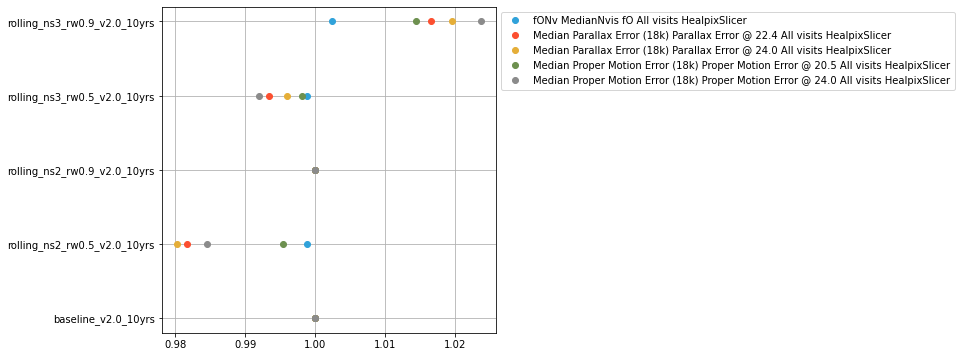

In [25]:
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
)

The labels on this plot are long and hard to interpret, but shorter names for both runs and metrics are available in the `pandas.DataFrames` we have already downloaded, and we can build transformations from these `DataFrame`s.

In [26]:
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]
metric_label_map

metric
fONv MedianNvis fO All visits HealpixSlicer                                                      fONv MedianNvis
Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer              Med Parallax Error @22.4
Median Parallax Error (18k) Parallax Error @ 24.0 All visits HealpixSlicer              Med Parallax Error @24.0
Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All visits HealpixSlicer          Med PM Error @20.5
Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All visits HealpixSlicer          Med PM Error @24.0
Name: short_name, dtype: object

In [27]:
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]
run_label_map

run
baseline_v2.0_10yrs                                 v2.0 baseline
rolling_ns2_rw0.5_v2.0_10yrs     Rolling half-sky (2 regions) 50%
rolling_ns3_rw0.5_v2.0_10yrs    Rolling third-sky (3 regions) 50%
rolling_ns2_rw0.9_v2.0_10yrs     Rolling half-sky (2 regions) 90%
rolling_ns3_rw0.9_v2.0_10yrs    Rolling third-sky (3 regions) 90%
Name: brief, dtype: object

These can be passed to `plot_metric_summary` to replace the labels:

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

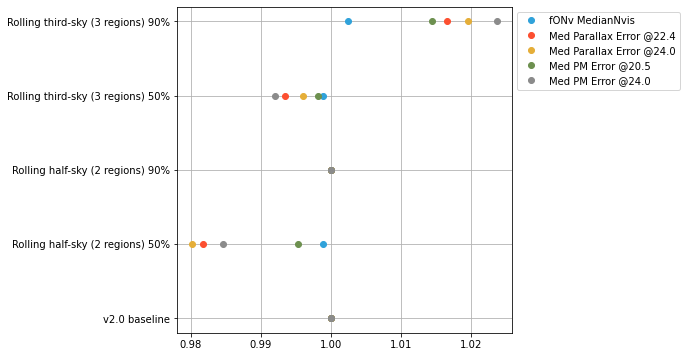

In [28]:
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
)

The `vertical_quantity` and `horizontal_quantity` options will let you set which axis (horizontal, vertical, or color) is mapped to which quantity (run, metric name, metric value), and additional arguments set the color maps, markers, and line styles connecting the points:

/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Mean WeakLensingNvisits fiveSigmaDepth, visitExposureTime i band non-DD HealpixSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "SNIa_PrePeak non-DD UserPointsSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "TDEsPopMetric__some_color_pu  UserPointsSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Fast Microlensing  UserPointsSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/surv

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

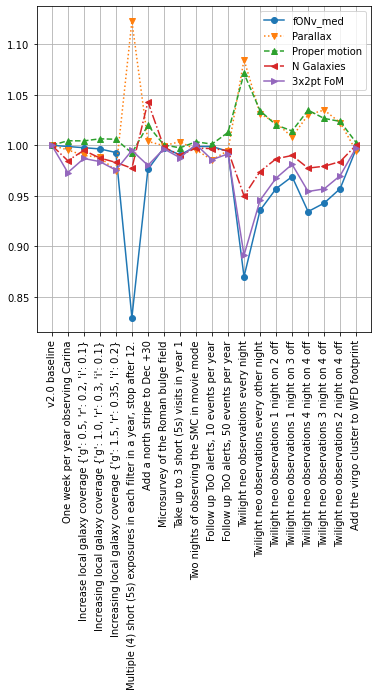

In [29]:
import matplotlib as mpl

this_metric_set = "radar"

this_family = ["baseline", "microsurveys"]
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]

summary = archive.get_metric_summaries(this_family, this_metric_set)
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
    vertical_quantity="value",
    horizontal_quantity="run",
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
    cmap=mpl.cm.tab10,
    linestyles=["-", ":", "--", "-."],
    markers=["o", "v", "^", "<", ">", "*", "H", "D"],
)

In [30]:
summary

metric,fONv MedianNvis fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All visits HealpixSlicer,N Galaxies (all) GalaxyCountsMetric_extended i band HealpixSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer
run,,,,,
baseline_v2.0_10yrs,839.0,2.423048,0.190588,1.203628e+10,37.908126
carina_v2.0_10yrs,838.0,2.411919,0.191445,1.185279e+10,36.886157
local_gal_bindx0_v2.0_10yrs,837.0,2.398719,0.191418,1.197591e+10,37.413020
local_gal_bindx1_v2.0_10yrs,836.0,2.394418,0.191811,1.188463e+10,37.297158
local_gal_bindx2_v2.0_10yrs,833.0,2.361907,0.191726,1.183273e+10,36.979896
multi_short_v2.0_10yrs,696.0,2.720751,0.189133,1.176274e+10,37.714491
north_stripe_v2.0_10yrs,819.0,2.432338,0.194358,1.255352e+10,37.155985
roman_v2.0_10yrs,837.0,2.422213,0.190657,1.201505e+10,37.774065
short_exp_v2.0_10yrs,831.0,2.431687,0.190113,1.191703e+10,37.443606


## Mesh plots

Alternately, you can color code the metric value itself using `plot_run_metric_mesh`:

/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Nvisits All" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Nvisits Long Exp" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Nvisits Long WFD" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Mean WeakLensingNvisits fiveSigmaDepth, visitExposureTime i band non-DD HealpixSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "SNIa_PrePeak non-

(<Figure size 432x432 with 2 Axes>, <AxesSubplot:>)

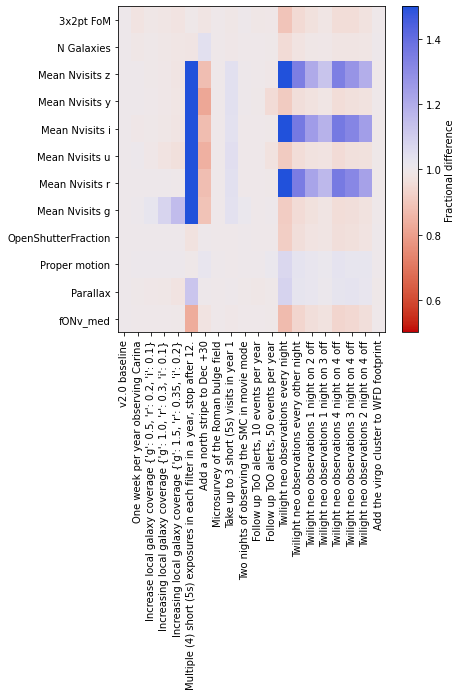

In [31]:
this_metric_set = ["Nvis", "radar"]
metric_label_map = metric_sets.loc[this_metric_set, "short_name"].droplevel(
    "metric set"
)

this_family = ["baseline", "microsurveys"]
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]

summary = archive.get_metric_summaries(this_family, this_metric_set)

maf.plot_run_metric_mesh(
    summary,
    baseline_run=baseline_run,
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
)

## Radar plots

Finally, if the numbers of runs and metrics are manageable, you can compare different metrics of different runs with a radar plot.

Let's select a modest collection of metrics and family of runs, and build a summary:

In [32]:
family_runs.loc[["baseline", "retro", "rolling"], :]

,run,brief,filepath,version,reference,description,url
family,,,,,,,
baseline,baseline_v2.0_10yrs,v2.0 baseline,baseline/baseline_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**baseline** : The v2.0 baseline simulation. T...,http://epyc.astro.washington.edu/~lynnej/opsim...
retro,baseline_retrofoot_v2.0_10yrs,v1.x footprint but new code capabilities,retro/baseline_retrofoot_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**retro** : The retro family provides two simu...,http://epyc.astro.washington.edu/~lynnej/opsim...
retro,retro_baseline_v2.0_10yrs,v1.x baseline with rubin_sim (without new code...,retro/retro_baseline_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**retro** : The retro family provides two simu...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns2_rw0.5_v2.0_10yrs,Rolling half-sky (2 regions) 50%,rolling/rolling_ns2_rw0.5_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns3_rw0.5_v2.0_10yrs,Rolling third-sky (3 regions) 50%,rolling/rolling_ns2_rw0.9_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns2_rw0.9_v2.0_10yrs,Rolling half-sky (2 regions) 90%,rolling/rolling_ns3_rw0.5_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...
rolling,rolling_ns3_rw0.9_v2.0_10yrs,Rolling third-sky (3 regions) 90%,rolling/rolling_ns3_rw0.9_v2.0_10yrs.db,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,http://epyc.astro.washington.edu/~lynnej/opsim...


In [33]:
this_metric_set = "radar"
this_family = ["baseline", "retro", "rolling"]
summary = archive.get_metric_summaries(this_family, this_metric_set)

/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Mean WeakLensingNvisits fiveSigmaDepth, visitExposureTime i band non-DD HealpixSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "SNIa_PrePeak non-DD UserPointsSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "TDEsPopMetric__some_color_pu  UserPointsSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Fast Microlensing  UserPointsSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/surv

The radar plot function requires that the data already be normalized, so normalize it:

In [34]:
norm_summary = maf.normalize_metric_summaries(baseline_run, summary)

The radar plot function takes the run and metric names from the `DataFrame` row and column names, so we can use short name by renaming the rows and columns:

In [35]:
metric_label_map = metric_sets.loc[this_metric_set, "short_name"]
run_label_map = family_runs.loc[this_family, ["run", "brief"]].set_index("run")["brief"]
norm_summary.rename(columns=run_label_map, index=metric_label_map, inplace=True)

Make the radar plot:

(<Figure size 612x360 with 1 Axes>, <RadarAxesSubplot:>)

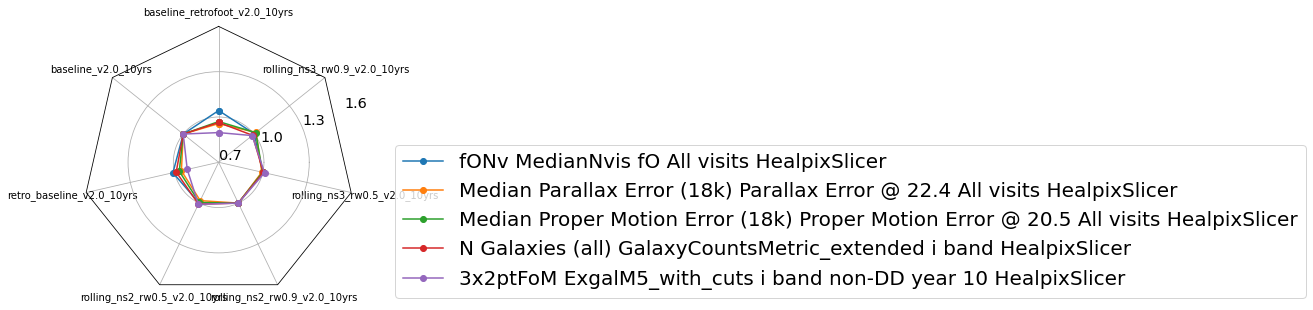

In [36]:
maf.radar(norm_summary.T, bbox_to_anchor=(4.5, 0))

## Plotting yet more metrics and runs

Multiple sets of metrics and families of runs can be retrieved and plotted at once, and these can be supplemented by additional individual runs and metrics:

In [37]:
these_metric_sets = ["srd", "Nvis", "radar"]
these_families = ["baseline", "retro", "rolling"]
extra_runs = ["ddf_frac_ddf_per0.6_v2.0_10yrs", "ddf_frac_ddf_per1.6_v2.0_10yrs"]
extra_metrics = [
    "Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer",
]
summary = archive.get_metric_summaries(
    these_families, these_metric_sets, runs=extra_runs, metrics=extra_metrics
)

/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Nvisits All" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Nvisits Long Exp" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Nvisits Long WFD" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "Mean WeakLensingNvisits fiveSigmaDepth, visitExposureTime i band non-DD HealpixSlicer" not in summary, skipping
  warnings.warn(f'Metric "{metric}" not in summary, skipping')
/data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/archive.py:379: UserWarning: Metric "SNIa_PrePeak non-

Because the slicing in pandas will return a multilevel index when multiple runs or families are sliced on, a little additional processing is needed to get a mapping from run or index name alone:

In [38]:
these_metrics = list(summary.columns)
metric_label_map = (
    metric_sets.loc[(slice(None), these_metrics), "short_name"]
    .groupby("metric")
    .first()
)
these_runs = list(summary.index)
run_label_map = (
    family_runs[["run", "brief"]]
    .set_index("run")
    .loc[these_runs, "brief"]
    .groupby("run")
    .first()
)

(<Figure size 432x432 with 2 Axes>, <AxesSubplot:>)

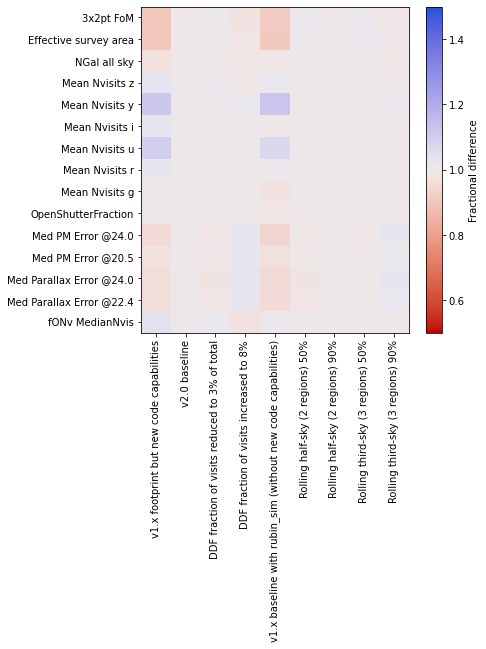

In [39]:
maf.plot_run_metric_mesh(
    summary,
    baseline_run=baseline_run,
    run_label_map=run_label_map,
    metric_label_map=metric_label_map,
)

## Plotting other metrics

Not all metrics present in the summary table have corresponding columns in the `metrics_set` data. If they do not, they cannot be normalized, and do not show up in the plots of normalized values.
For exmample, minimum WFD depth values have no normalization values:

In [40]:
min_depth_metrics = tuple(f"Min CoaddM5 WFD {b} band HealpixSlicer" for b in "ugrizy")
min_depth_metrics

('Min CoaddM5 WFD u band HealpixSlicer',
 'Min CoaddM5 WFD g band HealpixSlicer',
 'Min CoaddM5 WFD r band HealpixSlicer',
 'Min CoaddM5 WFD i band HealpixSlicer',
 'Min CoaddM5 WFD z band HealpixSlicer',
 'Min CoaddM5 WFD y band HealpixSlicer')

In [41]:
metric_sets.loc[(slice(None), min_depth_metrics), :]

,,metric,short_name,short_names_norm,style,invert,mag
metric set,metric,,,,,,


We can still load the un-normalied metric values:

In [42]:
summary = archive.get_metric_summaries(["baseline", "retro"], metrics=min_depth_metrics)
summary

metric,Min CoaddM5 WFD y band HealpixSlicer,Min CoaddM5 WFD i band HealpixSlicer,Min CoaddM5 WFD z band HealpixSlicer,Min CoaddM5 WFD r band HealpixSlicer,Min CoaddM5 WFD u band HealpixSlicer,Min CoaddM5 WFD g band HealpixSlicer
run,,,,,,
baseline_retrofoot_v2.0_10yrs,21.004279,22.083599,20.734998,22.829660,22.601271,22.804193
baseline_v2.0_10yrs,21.121757,22.255772,21.627708,22.418345,22.336704,22.406911
retro_baseline_v2.0_10yrs,20.671174,22.494169,21.573026,22.896677,22.315620,23.412605


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

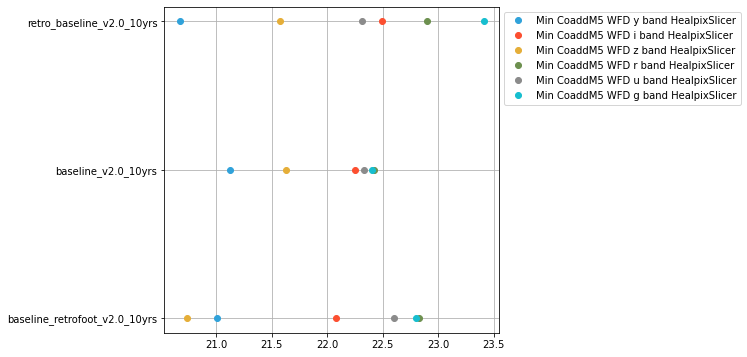

In [43]:
maf.plot_run_metric(summary)

If you want to properly normalize them, you can create you own metrics `DataFrame`:

In [44]:
import pandas as pd

my_metrics = (
    pd.DataFrame(
        {
            "metric set": "Min WFD depth",
            "metric": min_depth_metrics,
            "short_name": [f"Min {b} band depth in WFD" for b in "ugrizy"],
            "style": "-",
            "invert": False,
            "mag": True,
        }
    )
    .set_index("metric set")
    .set_index("metric", append=True, drop=False)
)
my_metrics

metric  \
metric set    metric                                                                       
Min WFD depth Min CoaddM5 WFD u band HealpixSlicer  Min CoaddM5 WFD u band HealpixSlicer   
              Min CoaddM5 WFD g band HealpixSlicer  Min CoaddM5 WFD g band HealpixSlicer   
              Min CoaddM5 WFD r band HealpixSlicer  Min CoaddM5 WFD r band HealpixSlicer   
              Min CoaddM5 WFD i band HealpixSlicer  Min CoaddM5 WFD i band HealpixSlicer   
              Min CoaddM5 WFD z band HealpixSlicer  Min CoaddM5 WFD z band HealpixSlicer   
              Min CoaddM5 WFD y band HealpixSlicer  Min CoaddM5 WFD y band HealpixSlicer   

                                                                 short_name  \
metric set    metric                                                          
Min WFD depth Min CoaddM5 WFD u band HealpixSlicer  Min u band depth in WFD   
              Min CoaddM5 WFD g band HealpixSlicer  Min g band depth in WFD   
              Min CoaddM5 WFD r band HealpixSlicer  Min r band depth in WFD   
              Min CoaddM5 WFD i band HealpixSlicer  Min i band depth in WFD   
              Min CoaddM5 WFD z band HealpixSlicer  Min z band depth in WFD   
              Min CoaddM5 WFD y band HealpixSlicer  Min y band depth in WFD   

                                                   style  invert   mag  
metric set    metric                                                    
Min WFD depth Min CoaddM5 WFD u band HealpixSlicer     -   False  True  
              Min CoaddM5 WFD g band HealpixSlicer     -   False  True  
              Min CoaddM5 WFD r band HealpixSlicer     -   False  True  
              Min CoaddM5 WFD i band HealpixSlicer     -   False  True  
              Min CoaddM5 WFD z band HealpixSlicer     -   False  True  
              Min CoaddM5 WFD y band HealpixSlicer     -   False  True

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

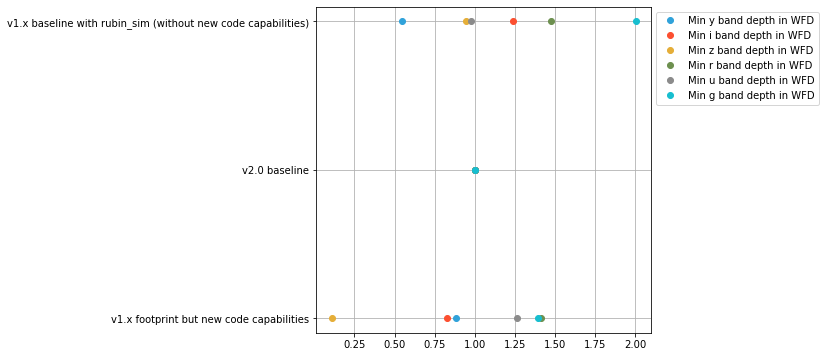

In [45]:
maf.plot_run_metric(
    summary,
    baseline_run=baseline_run,
    run_label_map=run_label_map,
    metric_label_map=my_metrics.droplevel("metric set")["short_name"],
    metric_set=my_metrics,
)

## Running additional MAF metrics

If the summary metrics are inadequate for what you need, you can download the opsim databases using URLs found in the `runs` `DataFrame` we downloaded above (using `get_runs`):

In [46]:
runs

,family,version,brief,filepath,url
run,,,,,
baseline_retrofoot_v2.0_10yrs,[retro],[2],v1.x footprint but new code capabilities,retro/baseline_retrofoot_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
baseline_v2.0_10yrs,[baseline],[2],v2.0 baseline,baseline/baseline_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
bluer_indx0_v2.0_10yrs,[bluer],[2],"More g - filter ratio in WFD of {'u': 0.07, 'g...",bluer/bluer_indx0_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
bluer_indx1_v2.0_10yrs,[bluer],[2],More u and g - filter ratio in WFD of {'u': 0....,bluer/bluer_indx1_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
carina_v2.0_10yrs,[microsurveys],[2],One week per year observing Carina,microsurveys/virgo_cluster/virgo_cluster_v2.0_...,http://epyc.astro.washington.edu/~lynnej/opsim...
...,...,...,...,...,...
vary_nes_nesfrac0.50_v2.0_10yrs,[vary_nes],[2],NES at 50% WFD level,vary_nes/vary_nes_nesfrac0.50_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
vary_nes_nesfrac0.55_v2.0_10yrs,[vary_nes],[2],NES at 55% WFD level,vary_nes/vary_nes_nesfrac0.55_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...
vary_nes_nesfrac0.75_v2.0_10yrs,[vary_nes],[2],NES at 75% WFD level,vary_nes/vary_nes_nesfrac0.75_v2.0_10yrs.db,http://epyc.astro.washington.edu/~lynnej/opsim...


You will need to specify a directory into which to download runs. To set where this notebook stores the run databases it downloads, uncomment the following cell and set the `out_dir` to your desired location:

In [47]:
# out_dir = '.'

For the purposes of this example, if you do not set the `out_dir`, this notebook creates a temporary directory (which will be deleted when the notebook process ends):

In [48]:
from tempfile import TemporaryDirectory
import os

try:
    print(f"Output directory for downloaded opsim run databases is set to {out_dir}.")
except NameError:
    temp_dir = TemporaryDirectory(dir=os.getcwd(), prefix="tmp_opsim_runs_")
    out_dir = temp_dir.name
    print(
        f"Temporary directory {out_dir} created for the storage of opsim databases downloaded by this notebook."
    )
    print("These will be deleted when this notebook is stopped or restarted!")

Temporary directory /data/des91.b/data/neilsen/LSST/devel/survey_strategy/fbs_2.0/tmp_opsim_runs_8y6mkdan created for the storage of opsim databases downloaded by this notebook.
These will be deleted when this notebook is stopped or restarted!


You also need to build a list of runs to download. One easy way is to select the runs that are part of a family, as present in the `family_runs` `DataFrame` we created with `get_family_runs` above:

In [49]:
my_runs = family_runs.loc[["baseline", "retro"], "run"].tolist()
my_runs

['baseline_v2.0_10yrs',
 'baseline_retrofoot_v2.0_10yrs',
 'retro_baseline_v2.0_10yrs']

Now you can download the opsim output of interest into your runs directory:

In [50]:
dest_fnames = archive.download_runs(my_runs, out_dir)
dest_fnames

OpsimRun
baseline_v2.0_10yrs              /data/des91.b/data/neilsen/LSST/devel/survey_s...
baseline_retrofoot_v2.0_10yrs    /data/des91.b/data/neilsen/LSST/devel/survey_s...
retro_baseline_v2.0_10yrs        /data/des91.b/data/neilsen/LSST/devel/survey_s...
Name: fname, dtype: object

Note that the return is a `pandas.Series` that maps run name to the file name it was downloaded into. You can now proceed to use these opsim database for your own MAF analysis.